In [1]:
import numpy as np
import pandas as pd
import os
import glob


In [3]:
root_path="/content/drive/My Drive/Uni Stuff/DSinLS/Task8/Tweets/CSV/"
all_files = glob.glob(root_path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, parse_dates=['timestamp'] ,header=0)
    li.append(df)
tweetsDF= pd.concat(li, axis=0, ignore_index=True)
tweetsDF = tweetsDF.loc[:, df.columns.intersection(['tweet_id','text','timestamp'])]
tweetsDF.head(5)

,text,timestamp,tweet_id
0,Two questions: What if the coronavirus is a na...,2020-04-26 23:59:59,1.254561e+18
1,Here's what's wrong with the Paycheck Protecti...,2020-04-26 23:59:59,1.254561e+18
2,Decomisan mercancía a 5 comerciantes en Av Pas...,2020-04-26 23:59:59,1.254561e+18
3,"""Tem que cheirar pro corona vírus não pegar em...",2020-04-26 23:59:59,1.254561e+18
4,Vacuna contra el coronavirus: dos laboratorios...,2020-04-26 23:59:59,1.254561e+18


In [4]:
from textblob import TextBlob
polarity_list=[]
subjectivity_list=[]
for index, row in tweetsDF.iterrows():
  if isinstance(row.text, str):
    polarity_list.append(TextBlob(row.text).sentiment.polarity)
    subjectivity_list.append(TextBlob(row.text).sentiment.subjectivity)
  else:
    polarity_list.append(0)
    subjectivity_list.append(0)



In [5]:
tweetsDF['polarity']=polarity_list
tweetsDF['subjectivity']=subjectivity_list

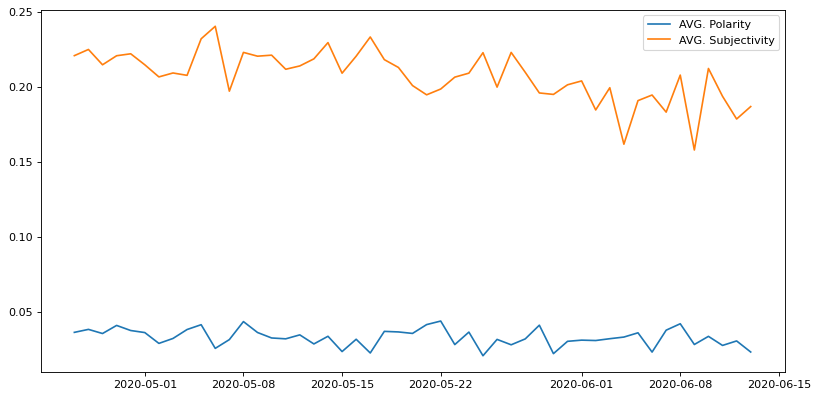

In [16]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
dataFrame = tweetsDF.groupby(tweetsDF['timestamp'].dt.date).mean()
plt.plot(dataFrame.index.values, dataFrame.polarity,label='AVG. Polarity')
plt.plot(dataFrame.index.values, dataFrame.subjectivity,label='AVG. Subjectivity')
#plt.xlabel("Date")
#plt.title("Polarity and Subjectivity Average for Tweets per day")
plt.legend()
plt.show()